## Проект по эконометрике
Владивосток (id = 92) и Казань (id = 45) \
2010, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)


In [3]:
path_2010 = r"C:\Users\User\Desktop\Проект по эконометрике\data_individuals_2010.sav"
path_2017 = r"C:\Users\User\Desktop\Проект по эконометрике\data_individuaks_2017.sav"

In [4]:
df_2010 = pd.read_spss(path_2010)
df_2017 = pd.read_spss(path_2017)

Владивосток обозначим как 0, Казань - 1 \
Извлечем необходимые города и обработаем таргет (0j13.2 и vj13.2 - среднемесячная заработная плата): удалим пропуски, ответы в формате 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА', приведем к единому типу данных и оставим только значения больше 0

In [9]:
data_2010 = df_2010[(df_2010['region'] == 'Владивосток') | (df_2010['region'] == 'Казань')].dropna(subset = ['oj13.2'], axis = 0)
data_2017 = df_2017[(df_2017['region'] == 'Владивосток') | (df_2017['region'] == 'Казань')].dropna(subset = ['vj13.2'], axis = 0)
data_2010 = data_2010[~(data_2010['oj13.2'].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']))]
data_2017 = data_2017[~(data_2017['vj13.2'].isin(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']))]
data_2010['oj13.2'] = data_2010['oj13.2'].cat.remove_unused_categories()
data_2017['vj13.2'] = data_2017['vj13.2'].cat.remove_unused_categories()
data_2010['oj13.2'] = data_2010['oj13.2'].astype(float)
data_2017['vj13.2'] = data_2017['vj13.2'].astype(float)
data_2010 = data_2010[data_2010['oj13.2'] > 0] #удалил приколистов
data_2017 = data_2017[data_2017['vj13.2'] > 0] #удалил приколистов
data_2010['region'] = data_2010['region'].map({'Владивосток': 0, 'Казань': 1})
data_2017['region'] = data_2017['region'].map({'Владивосток': 0, 'Казань': 1})

Изучим, насколько пересекаются группы в выборках (idind - идентификатор человека, который не меняется со временем)

In [10]:
list_2010 = data_2010['idind'].to_list()
list_2017 = data_2017['idind'].to_list()
counter = 0
for elem in list_2017:
    if elem in list_2010:
        counter += 1
print(counter/len(list_2017))

0.34801762114537443


In [11]:
#Поисследуем выборки: 
data_2010_Kazan = data_2010[data_2010['region'] == 1]
data_2010_Vlad = data_2010[data_2010['region'] == 0]
data_2017_Kazan = data_2017[data_2017['region'] == 1]
data_2017_Vlad = data_2017[data_2017['region'] == 0]

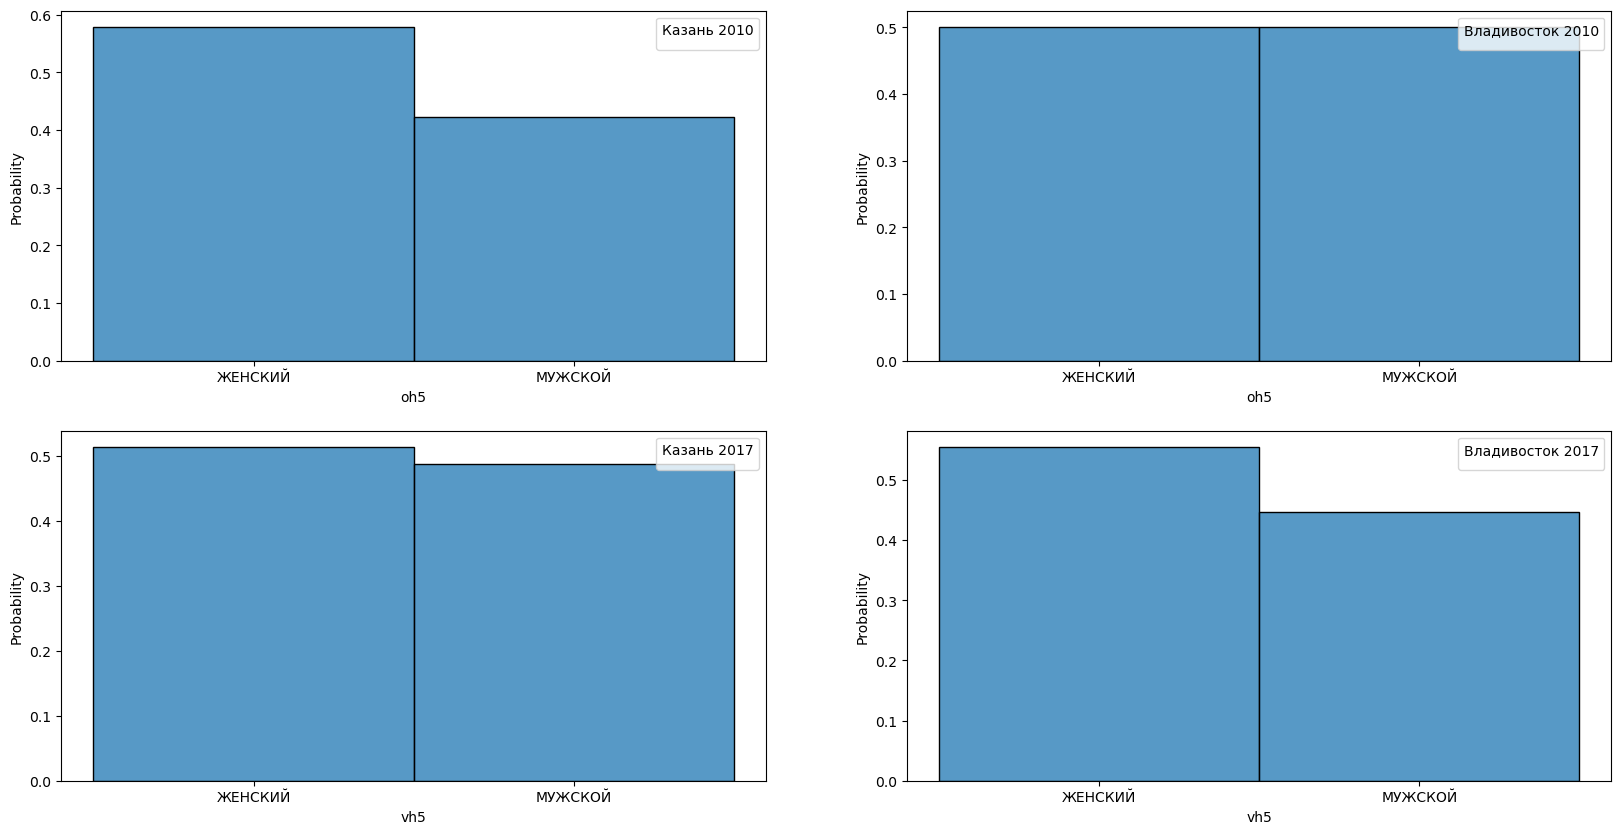

In [12]:

fig, ax = plt.subplots(2,2, figsize = (20,10))
ax1, ax2, ax3,  ax4 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]
sns.histplot(data_2010_Kazan, x = 'oh5', ax = ax1, stat = 'probability')
ax1.legend(title='Казань 2010')  
sns.histplot(data_2010_Vlad, x = 'oh5', ax = ax2, stat = 'probability')
ax2.legend(title='Владивосток 2010')  
sns.histplot(data_2017_Kazan, x = 'vh5', ax = ax3, stat = 'probability')
ax3.legend(title='Казань 2017')  
sns.histplot(data_2017_Vlad, x = 'vh5', ax = ax4, stat = 'probability')
ax4.legend(title='Владивосток 2017')  
plt.show()


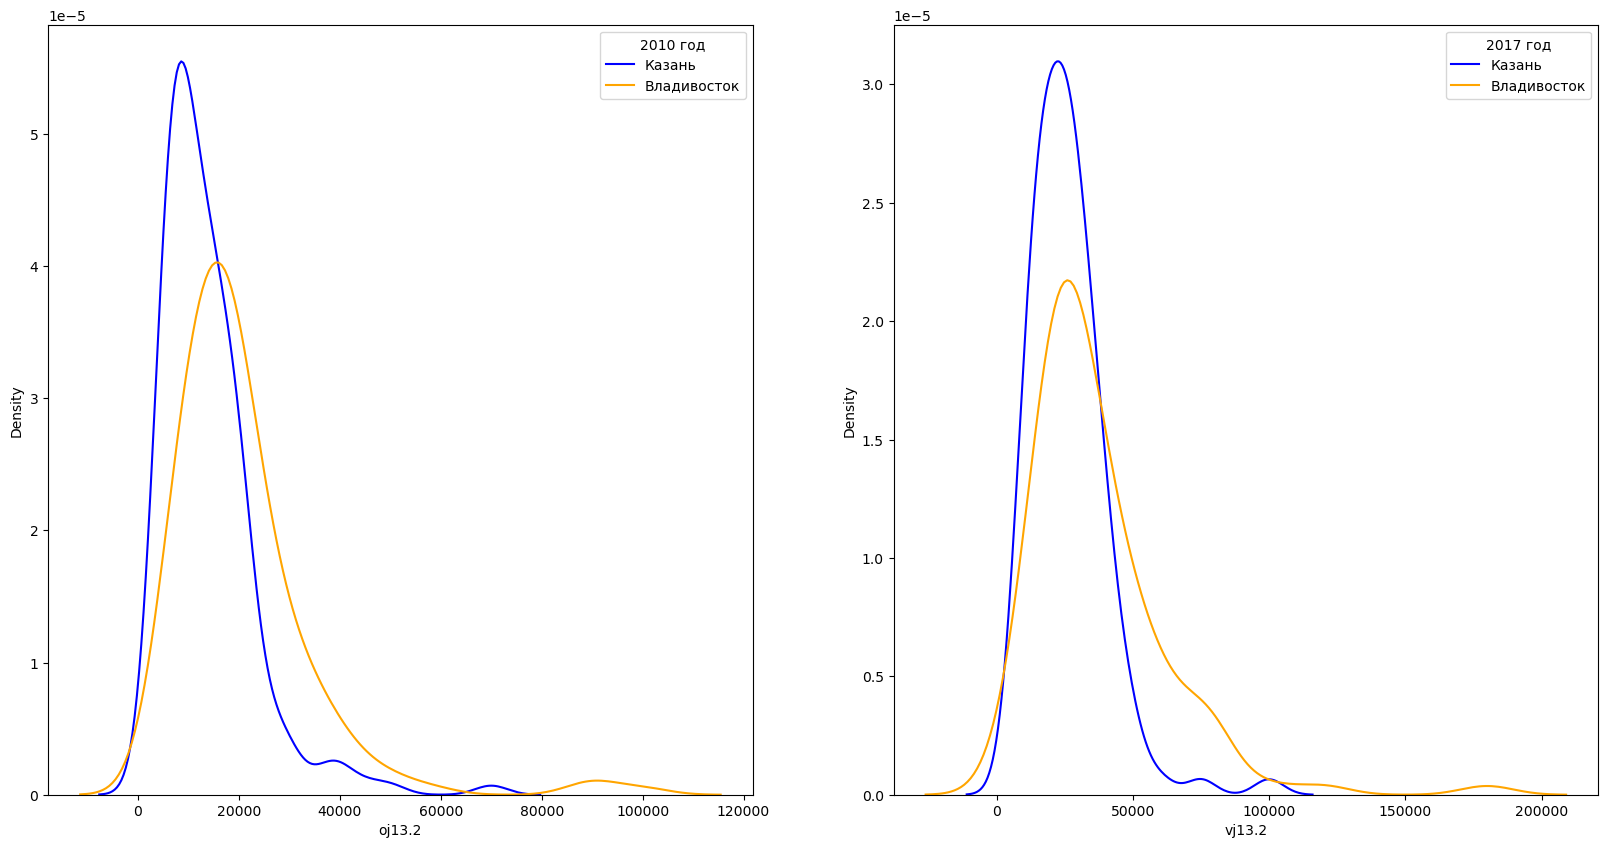

In [13]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
ax1, ax2 = ax[0], ax[1]
sns.kdeplot(data = data_2010_Kazan, ax = ax1, x = 'oj13.2', color = 'blue', label = 'Казань')
sns.kdeplot(data = data_2010_Vlad, ax = ax1, x = 'oj13.2', color = 'orange', label = 'Владивосток')
ax1.legend(title = '2010 год')
sns.kdeplot(data = data_2017_Kazan, ax = ax2, x = 'vj13.2', color = 'blue', label = 'Казань')
sns.kdeplot(data = data_2017_Vlad, ax = ax2, x = 'vj13.2', color = 'orange', label = 'Владивосток')
ax2.legend(title = '2017 год')
plt.show()

Явно видим, что таргет распределен не нормально => логарифмируем

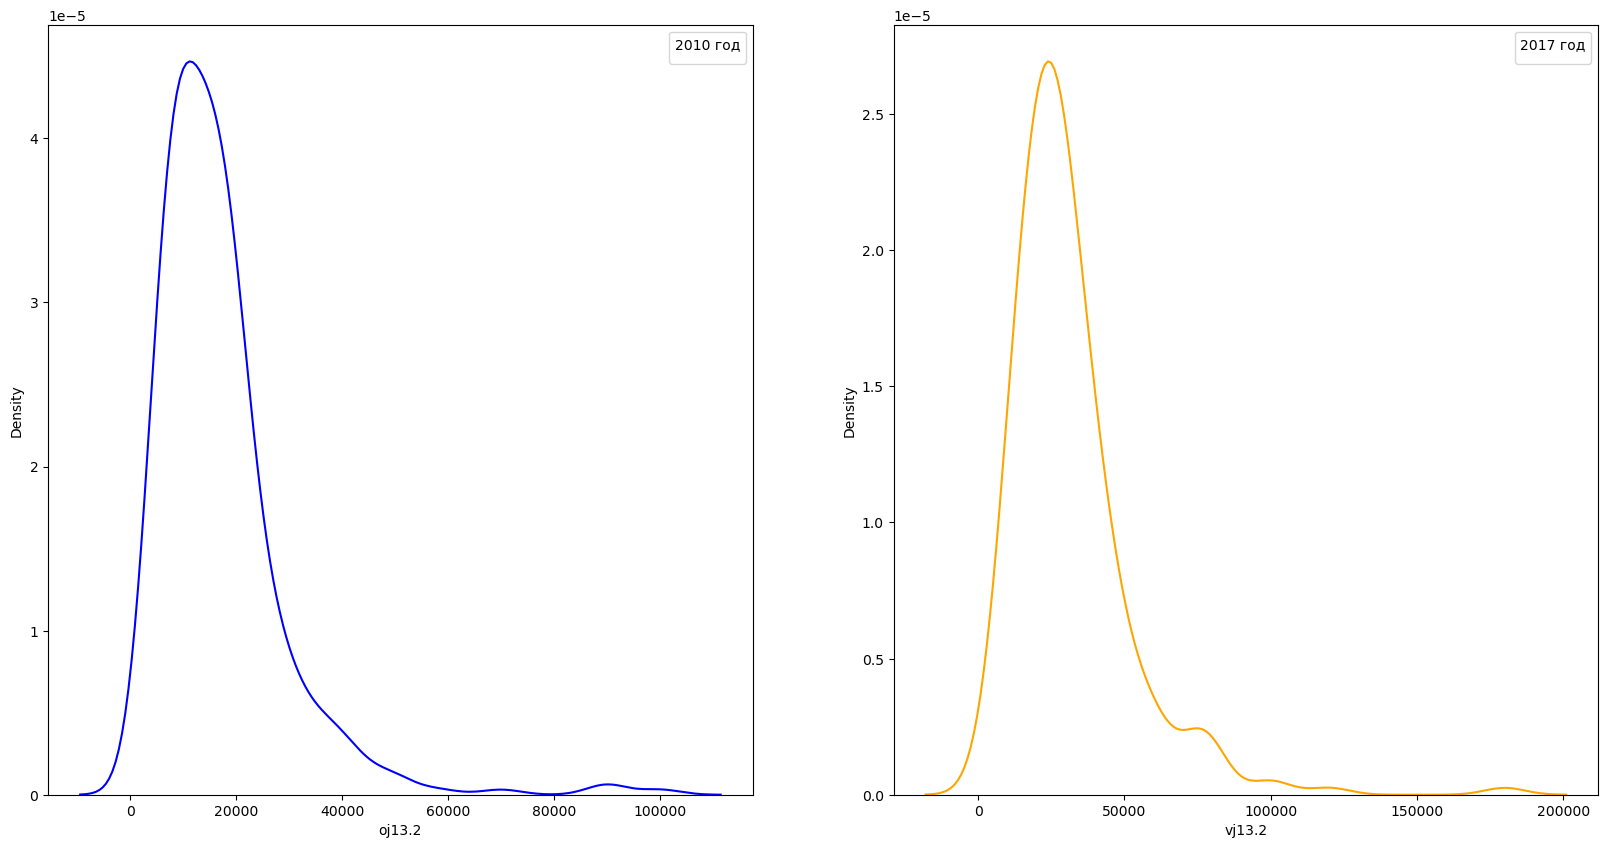

In [14]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax1, ax2 = ax[0], ax[1]
sns.kdeplot(data = data_2010, ax = ax1, x = 'oj13.2', color = 'blue')
ax1.legend(title = '2010 год')
sns.kdeplot(data = data_2017, ax = ax2, x = 'vj13.2', color = 'orange')
ax2.legend(title = '2017 год')
plt.show()

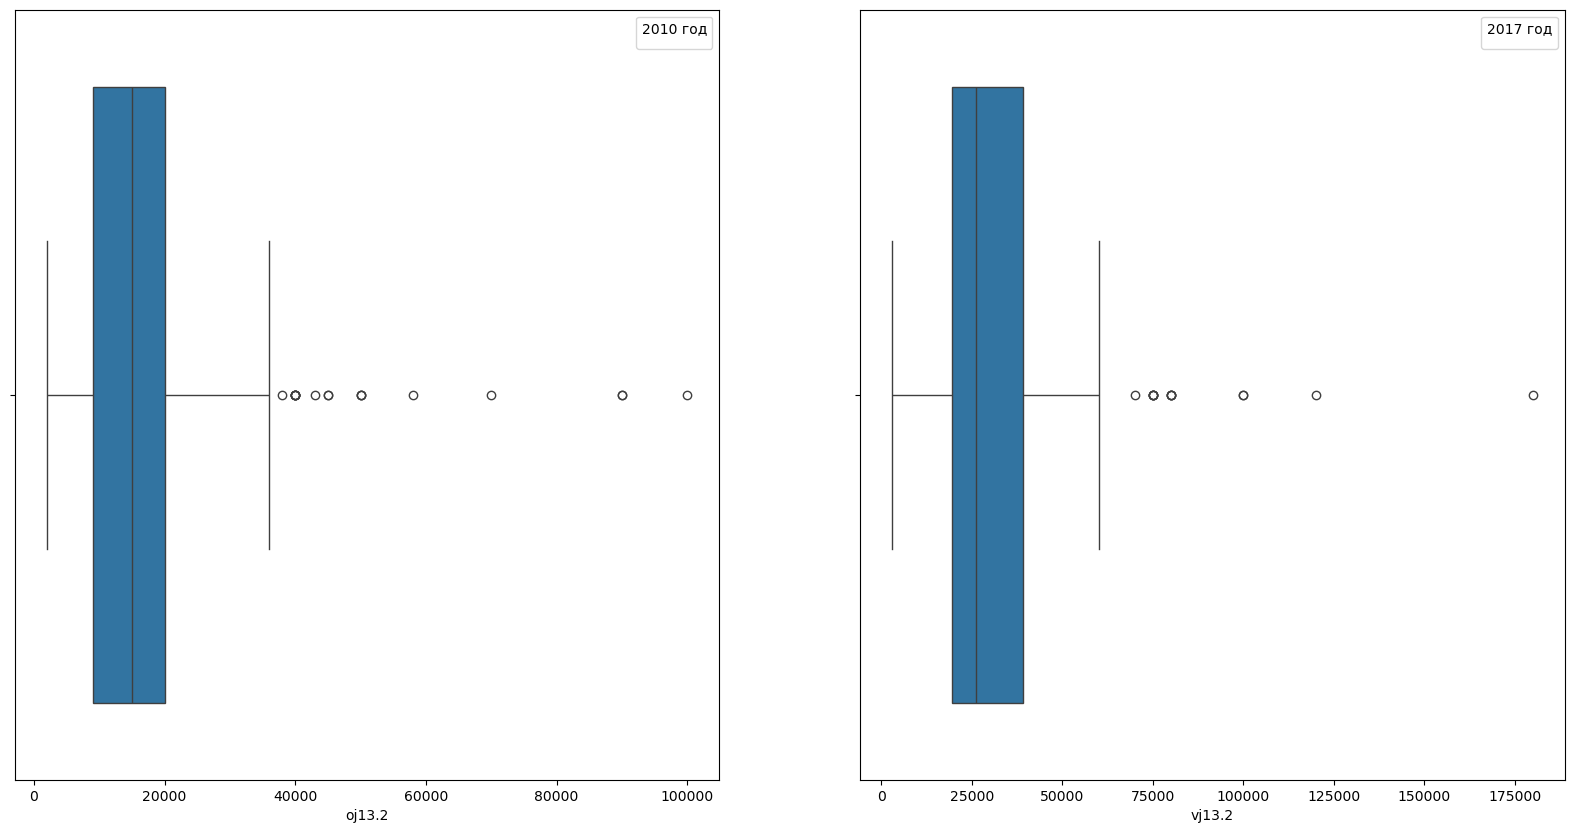

In [15]:

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax1, ax2 = ax[0], ax[1]
sns.boxplot(data = data_2010, x = 'oj13.2', ax = ax1)
ax1.legend(title = '2010 год')
sns.boxplot(data = data_2017, x = 'vj13.2', ax = ax2)
ax2.legend(title = '2017 год')
plt.show()

In [16]:
print(data_2010.shape)
print(data_2017.shape)

(338, 927)
(227, 929)


In [19]:

def classify_education_level(education_str):
    """
    Классифицирует уровень образования на 4 категории:
    1. Среднее общее
    2. Профессиональное
    3. Высшее
    4. Неизвестно
    
    Args:
        education_str (str): Строка с описанием уровня образования
        
    Returns:
        str: Категория образования
    """
    if pd.isna(education_str):
        return 'Неизвестно'
    
    # Приводим к нижнему регистру для надежного сравнения
    edu_lower = str(education_str).lower().strip()
    
    # 1. Группа "Неизвестно" (приоритетная проверка)
    unknown_keywords = ['затрудняюсь', 'нет ответа', 'отказ от ответа', 'не знаю', 'не помню']
    if any(keyword in edu_lower for keyword in unknown_keywords):
        return 'Неизвестно'
    
    # 2. Группа "Высшее образование"
    higher_edu_keywords = [
        'высшем учебном заведении', 
        'аспирантура', 
        'диплом о высшем образовании',
        'бакалавриат',
        'магистратура',
        'специалитет'
    ]
    if any(keyword in edu_lower for keyword in higher_edu_keywords):
        return 'Высшее'
    
    # 3. Группа "Профессиональное образование"
    prof_edu_keywords = [
        'птус дипломом',
        'птубез диплома',
        'техникум с дипломом',
        'техникум без диплома',
        'професс. обр. с дипломом',
        'професс. обр. без диплома',
        'профессиональное образование',
        'среднее профессиональное'
    ]
    if any(keyword in edu_lower for keyword in prof_edu_keywords):
        return 'Профессиональное'
    
    # 4. Группа "Среднее общее образование"
    secondary_edu_keywords = [
        'классов школы',
        'аттестат о ср. образовании',
        'аттестат о среднем образовании',
        'незак. среднее',
        'неполное среднее',
        'основное общее'
    ]
    if any(keyword in edu_lower for keyword in secondary_edu_keywords):
        return 'Среднее общее'
    
    # 5. Фолбэк для неопределенных случаев
    return 'Неизвестно'



In [20]:
def classify_firm_size_simple(value):
    # 1. Обрабатываем "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ" как микропредприятия
    if isinstance(value, str) and 'затрудняюсь' in value.lower():
        return 'Микро'  # ← КЛЮЧЕВОЕ ИЗМЕНЕНИЕ
    
    # 2. Для редких "НЕТ ОТВЕТА"/"ОТКАЗ" создаём dummy позже
    if pd.isna(value) or str(value).strip() in ['НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА', '']:
        return 'Микро'
    
    # 3. Обработка числовых значений
    if isinstance(value, (int, float)):
        if value <= 15: return 'Микро'
        elif value <= 100: return 'Малое'
        elif value <= 250: return 'Среднее'
        else: return 'Крупное'
    
    # 4. Обработка текстовых диапазонов
    value = str(value).lower()
    if any(x in value for x in ['до 15', '<15', 'микро']):
        return 'Микро'
    elif any(x in value for x in ['16-100', 'малое']):
        return 'Малое'
    elif any(x in value for x in ['101-250', 'средн']):
        return 'Среднее'
    elif any(x in value for x in ['>250', 'крупн']):
        return 'Крупное'
    
    return np.nan  # Остальные случаи → пропуск



In [21]:
def classify_diplom(value):
    if value in ['НЕТ ОТВЕТА', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']:
        return 'законченное среднее образование'
    elif value in ['незаконченное среднее образование (7 - 8 кл)', 'незаконченное среднее образование (7 - 8 кл) + что-то еще']:
        return 'незаконченное среднее'
    return value

def classify_build_year(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'неизвестно'
    return value

def classify_marry(value):
    if value in ['Состоите в повторном зарегистрированном браке', 
                 'Состоите в первом зарегистрированном браке',
                 'ОФИЦИАЛЬНО ЗАРЕГИСТРИРОВАНЫ, НО ВМЕСТЕ НЕ ЖИВУТ'
                 ]:
        return 'Состоят в браке'
    elif value in ['Вдовец/вдова']:
        return value
    return 'Не в браке'
def classify_language(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_government(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_smoking(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_hard_work(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return 'Нет'
    return value
def classify_time_job(value):
    if value in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]:
        return np.nan
    return value




In [27]:
def good_df(df, o):
    df[f'{o}_age'] = df[f'{o}_age'].astype(int)
    cat_features = df.select_dtypes(['category'])
    for elem in cat_features.columns:
        df[elem] = df[elem].cat.remove_unused_categories()
    df[f'{o}_educ_trans'] = df[f'{o}_educ'].apply(classify_education_level)
    df[f'{o}j13_trans'] = df[f'{o}j13'].apply(classify_firm_size_simple)
    df['log_target'] = df[f'{o}j13.2'].apply(lambda x: np.log(x))
    df = df.rename(columns={f'{o}j4.1':f'{o}j4_1', f'{o}j13.2' : f'{o}j13_2', 
                            f'{o}j72.173': f'{o}j72_173', f'{o}j21.3': f'{o}j21_3', f'{o}j6.2': f'{o}j6_2'})
    
    if o == 'o':
        df[f'{o}j72_173'] = df[f'{o}j72_173'].fillna(0).astype(int)#Пообсуждать
    else:
        df[f'{o}j72_173'] = df[f'{o}j72_173'].apply(lambda x: 0 if x == 'НЕТ ДЕТЕЙ МОЛОЖЕ 18' else x).fillna(0)

    if 'o_diplom_1' in df.columns:
        df[f'{o}_diplom_1'] = df[f'{o}_diplom_1'].apply(classify_diplom)
    else:
        df[f'{o}_diplom'] = df[f'{o}_diplom'].apply(classify_diplom)
    
    if 'oj308' in df.columns:
        df[f'{o}j308'] = df[f'{o}j308'].apply(classify_build_year)
    
    df[f'{o}j322'] = df[f'{o}j322'].apply(classify_marry)
    df[f'{o}j260'] = df[f'{o}j260'].apply(classify_language)#.cat.remove_unused_categories()
    df[f'{o}j23'] = df[f'{o}j23'].apply(classify_government)
    df[f'{o}j21_3'] = df[f'{o}j21_3'].apply(classify_hard_work)
    df[f'{o}j6_2'] = df[f'{o}j6_2'].apply(classify_time_job)
    return df



In [44]:
data_2010_base = data_2010[['oj13.2', 'o_educ', 'o_age', 'oj4.1', 'o_occup08', 'oj13', 'oh5', 
                            'region', 'o_diplom_1', 'oj322', 'oj72.173', 'oj260', 'oj23', 'oj21.3', 'oj6.2']]
data_2010_base = good_df(data_2010_base, 'o')
data_2010_base = data_2010_base.rename(columns={'oj13_2': 'salary',
                                        'o_educ_trans': 'education_level',
                                        'o_age': 'age',
                                        'oj4.1': 'sector',
                                        'o_occup08': 'job_group',
                                        'oj13_trans': 'firm_size',
                                        'oh5': 'gender',
                                        'region': 'region',
                                        'o_diplom_1': 'edication_level_2',
                                        'oj322': 'is_married',
                                        'oj72.173': 'num_of_child',
                                        'oj260': 'foreign_language',
                                        'oj23': 'is_goverment',
                                        'oj23': 'is_more_than_school',
                                        'oj21.3': 'is_dang_prod',
                                        'oj6.2': 'len_of_work_week',
                                        'log_target': 'log_salary'
                                        }).drop(['o_educ', 'oj13'], axis = 1)


In [45]:
data_2017_base = data_2017[['vj13.2', 'v_educ', 'v_age', 'vj4.1', 'v_occup08', 'vj13', 'vh5', 'region', 'v_diplom', 'vj322',
                             'vj72.173', 'vj260', 'vj23', 'vj21.3', 'vj6.2']]
data_2017_base = good_df(data_2017_base, 'v')
data_2017_base = data_2017_base.rename(columns={'vj13_2': 'salary',
                                        'v_educ_trans': 'education_level',
                                        'v_age': 'age',
                                        'vj4.1': 'sector',
                                        'v_occup08': 'job_group',
                                        'vj13_trans': 'firm_size',
                                        'vh5': 'gender',
                                        'region': 'region',
                                        'v_diplom': 'edication_level_2',
                                        'vj322': 'is_married',
                                        'vj72.173': 'num_of_child',
                                        'vj260': 'foreign_language',
                                        'vj23': 'is_goverment',
                                        'vj23': 'is_more_than_school',
                                        'vj21.3': 'is_dang_prod',
                                        'vj6.2': 'len_of_work_week',
                                        'log_target': 'log_salary'
                                        }).drop(['v_educ', 'vj13'], axis = 1)

In [46]:
data_2010_base.to_csv('data_2010.csv', index=False)
data_2017_base.to_csv('data_2017.csv', index=False)

In [47]:
df = pd.read_csv('data_2010.csv')

In [48]:
df

,salary,age,oj4_1,job_group,gender,region,edication_level_2,is_married,oj72_173,foreign_language,is_more_than_school,oj21_3,oj6_2,education_level,firm_size,log_salary
0,6000.0,54,ЗДРАВООХРАНЕНИЕ,Неквалифицированные рабочие всех отраслей,ЖЕНСКИЙ,1.0,законченное среднее образование,Вдовец/вдова,0,Нет,Да,Нет,40.0,Среднее общее,Микро,8.699515
1,5700.0,29,ОБРАЗОВАНИЕ,Специалисты высшего уровня квалификации,ЖЕНСКИЙ,1.0,законченное высшее образование и выше,Не в браке,0,Да,Да,Нет,48.0,Высшее,Малое,8.648221
2,12000.0,54,ЗДРАВООХРАНЕНИЕ,Специалисты среднего уровня квалификации; чино...,ЖЕНСКИЙ,1.0,законченное среднее специальное образование,Вдовец/вдова,0,Нет,Да,Да,40.0,Профессиональное,Крупное,9.392662
3,8000.0,28,ОБРАЗОВАНИЕ,Законодатели; крупные чиновники; руководители ...,ЖЕНСКИЙ,1.0,законченное высшее образование и выше,Не в браке,0,Нет,Да,Нет,40.0,Высшее,Крупное,8.987197
4,7000.0,52,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",Работники сферы торговли и услуг,ЖЕНСКИЙ,1.0,законченное среднее специальное образование,Вдовец/вдова,1,Нет,Нет,Нет,98.0,Профессиональное,Микро,8.853665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,20000.0,53,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",Специалисты высшего уровня квалификации,МУЖСКОЙ,0.0,законченное высшее образование и выше,Состоят в браке,0,Нет,Нет,Нет,NaN,Высшее,Малое,9.903488
334,12000.0,24,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",Служащие офисные и по обслуживанию клиентов,МУЖСКОЙ,0.0,законченное высшее образование и выше,Не в браке,0,Нет,Нет,Нет,NaN,Высшее,Микро,9.392662
335,18000.0,58,ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО,"Квалифицированные рабочие, занятые ручным трудом",МУЖСКОЙ,0.0,законченное среднее образование,Состоят в браке,0,Нет,Да,Да,40.0,Среднее общее,Малое,9.798127
336,10000.0,55,ЗДРАВООХРАНЕНИЕ,Специалисты среднего уровня квалификации; чино...,ЖЕНСКИЙ,0.0,законченное высшее образование и выше,Состоят в браке,0,Нет,Да,Нет,40.0,Высшее,Малое,9.210340
